## **Drug Performance Evaluation**

- **Name**  : Livia Amanda Annafiah
- **Dataset** : [Drug Performance Evaluation](https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation)

- **Tableau** : [Link](https://public.tableau.com/views/Tableau_Dashboard_17122463389420/MainMenu?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

-------
##### **Program Description**
The program is designed to analyze a specific dataset aimed at evaluating drug performance comprehensively. It encompasses a range of data analysis tasks, starting from data cleaning to data visualization techniques. The primary objective is to provide insights and facilitate decision-making processes related to drug performance.


### **Problem Identification**

##### **A. Topic**

Evaluating Drug Effectiveness and Cost-Effectiveness in a Pharmaceutical Context.

##### **B. Problem Statement**

**SMART Analysis**

- **Specific**:
The goal is to identify the most effective pharmaceutical drug that maximizes cost-efficiency for the company.

- **Measurable**:
The measurable outcome is to identify the most cost-effective drug, aiming to minimize costs by at least 15% while maintaining or improving drug performance metrics.

- **Achievable**:
This goal is achievable through data analysis to find the optimal balance between drug performance metrics and cost-effectiveness.

- **Relevant**:
This analysis is relevant to the company's strategic objectives, ensuring efficient allocation of resources and maximizing return on investment in pharmaceutical products.

- **Time-Based**:
The entire process, from data collection and analysis to decision-making and implementation, will be completed within a 6 months timeframe.



**Conclusion**

The goal is to identify the most cost-efficient pharmaceutical drug options, aiming to achieve a minimum cost reduction of 15%, all within a six-month period.

##### **C. Background**

<center>

![logo](./logo.png)

[Roleplay]

**Johnson & Johnson**, a leading pharmaceutical company, is facing financial challenges due to increased competition and rising costs. To boost profits, they are focusing on their pharmaceutical division. The specific aim is to identify the most effective drugs while also finding the most cost-efficient options, targeting a 15% cost reduction within six months. This strategic move aligns with their commitment to delivering quality healthcare solutions while improving financial performance and maintaining competitiveness in the market. 

##### **D. Description**

**5W+1H**

- **What** is the minimum number of reviews required to consider data as significant?

- **Which** disease occurs most frequently?

- **What** are the 5 most effective drugs from the most frequent disease?

- **What** are the price of the top 5 effective drugs? **How** much is the drug with the lowest price?

- **How** is the distribution of different drug forms (e.g., tablets, capsules, liquids) based on its ease of use rating?

- **How** does the ease of use rating correlate with its satisfaction levels? Is there a trend where higher ease of use leads to higher satisfaction levels?

- **Which** drugs gain higher satisfaction levels: prescription (RX) or over-the-counter (OTC)?

- **How** does the top 5 drugs performed (effectiveness, ease of use, and satisfaction levels)?

##### **E. Methods**

- Confidence Interval
- Filtering
- Correlation Analysis
- Hypothesis Testing (Two Sample Independent Test)

### **Data Loading and Exploration**

Dataset reference : https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation

The initial step for the analysis is to load the CSV data titled 'Drug Performance Evaluation' obtained from Kaggle. Exploration is then conducted to gain insights into the data, understanding its contents, and identifying potential analyses and findings.

In [88]:
# Import library
import pandas as pd
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

The provided code imports essential libraries for analysis. These include pandas for data manipulation, re for searching pattern, matplotlib and seaborn for creating visualizations, numpy for numerical computations, and scipy for statistical analysis.

In [89]:
# Reads csv file and save it to a variable
df = pd.read_csv("rawDrug.csv")

# Show dataframe
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1 Reviews,5.00,4.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...


After importing the library, the next step involves loading the data using the `pd.read_csv` function and assigning it to a variable. This variable is then used to display the dataframe. Upon inspection of the dataframe, it reveals 2219 rows and 9 columns, which are as follows:

- `Condition`: Provides information about the type of sickness or disease.
- `Drug`: Contains information about the drug name.
- `Indication`: Indicates whether the drug is on-label or off-label (FDA approved or not).
- `Type`: Specifies whether the drug is prescription (RX) obtained from a doctor or over-the-counter (OTC) available from a pharmacy without a doctor's prescription.
- `Reviews`: Represents the number of reviews the drug has received.
- `Effective`: Reflects the effectiveness rating of the drug, indicating how well it treats the customers. (0-5)
- `Ease of Use`: Rates the ease of use of the drug as reported by customers. (0-5)
- `Satisfaction`: Indicates the level of satisfaction customers have with the drug. (0-5)
- `Information`: Contains additional information about the drug.

In [90]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


The `head` method is used to display the first 5 rows of the table. From the result, there are some drug names that is duplicated, but with **varying values in other columns**. To maintain diversity and retain the wealth of data, drug names with different values will not be dropped. Instead, they will be assumed to represent different versions of the same drug.

In [91]:
# Checks summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.1+ KB


The `info()` method provides summary insights into the dataframe. It confirms the absence of missing values across all columns. Specifically, there are 6 columns with datatype `Object` and 3 columns with datatype `Float`. It's worth noting that certain datatypes may still require modification to ensure easier analysis.

In [92]:
# Checks missing values
df.isnull().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

The `isnull().sum()` method checks for missing values in the data. It can be seen that the dataframe doesn't have any missing values, which is a positive aspect. This indicates that there's no necessity to remove columns with `None` values.

In [93]:
# Count duplicated rows
df.duplicated().sum()

466

The `duplicated().sum()` method reveals that there are 466 duplicate rows in the dataset. Given that removing these duplicates won't affect the relevance of the data, they can be safely eliminated.

In [94]:
# Checks unique values of Condition column
df['Condition'].unique()

array(['Acute Bacterial Sinusitis', 'adenocarcinoma of pancreas',
       'Atopic Dermatitis', 'back pain', 'Bacterial Conjunctivitis',
       'Bacterial Urinary Tract Infection', 'biliary calculus',
       'chickenpox', 'colorectal cancer', 'depression',
       'diverticulitis of gastrointestinal tract', 'edema',
       'endometriosis', 'fever', 'fibromyalgia', 'flatulence',
       'furunculosis', 'gastroesophageal reflux disease',
       'genital herpes simplex', 'gout', 'hemorrhoids', 'herpes zoster',
       'hypercholesterolemia', 'hypertension', 'impetigo',
       'Infantile Autism', 'Influenza', "meniere's disease",
       'oral candidiasis', 'Pharyngitis due to Streptococcus Pyogenes',
       'prevention of cerebrovascular accident', 'pyelonephritis',
       'scabies', 'Sleepiness Due To Obstructive Sleep Apnea',
       'sore throat', 'vertigo', 'vulvovaginal candidiasis'], dtype=object)

The `unique` method is utilized to identify distinct values in the `Condition` column. This dataset contains numerous conditions, which will be categorized into a smaller set for more effective analysis.

There are inconsistencies in the condition names, with some capitalized and others in lowercase. However, for this analysis, these inconsistencies are not important as the conditions name will be changed anyways.

In [95]:
# Counts unique values of Drug column
df['Drug'].nunique()

470

The `nunique` method is used to count the unique values of the drugs to know how many drug is in the dataset. it can be conclued that there are 470 different drugs.

In [96]:
# Checks unique values of Indication column
df['Indication'].unique()

array(['On Label', 'Off Label', '\r\n'], dtype=object)

The `unique` method is used to show the unique values of the `Indication` column. It is noted that there are two types of indication, 'On Label' and 'Off Label'. 'On Label' refers to drugs that are approved by the FDA for specific uses as indicated on their labels, ensuring their safety and efficacy. Conversely, 'Off Label' signifies the use of drugs for purposes not explicitly approved by the FDA, which may involve experimental treatments.

However, since this distinction between 'On label' and 'Off label' indications isn't needed to the current analysis, it will be dropped or deleted from the dataset.

In [97]:
# Checks unique values of Type column
df['Type'].unique()

array(['RX', 'OTC', 'RX/OTC', '\r\n'], dtype=object)

The `unique` method is also employed to observe the unique values in the 'Type' column. This column comprises three distinct values: 'RX', 'OTC', and 'RX/OTC'. 'RX' (prescription) indicates that the drug can only be obtained through a doctor's prescription, while 'OTC' (over the counter) implies that the drug is available directly at the pharmacy without a prescription.

In [98]:
# Checks unique values of Reviews column
df['Reviews'].unique()

array(['994 Reviews', '755 Reviews', '584 Reviews', '437 Reviews',
       '361 Reviews', '353 Reviews', '222 Reviews', '140 Reviews',
       '72 Reviews', '43 Reviews', '40 Reviews', '23 Reviews',
       '20 Reviews', '19 Reviews', '15 Reviews', '13 Reviews',
       '12 Reviews', '11 Reviews', '10 Reviews', '5 Reviews', '4 Reviews',
       '3 Reviews', '2 Reviews', '1 Reviews', '156 Reviews', '33 Reviews',
       '29 Reviews', '27 Reviews', '26 Reviews', '17 Reviews',
       '2575 Reviews', '586 Reviews', '364 Reviews', '321 Reviews',
       '235 Reviews', '151 Reviews', '129 Reviews', '118 Reviews',
       '113 Reviews', '104 Reviews', '89 Reviews', '79 Reviews',
       '68 Reviews', '59 Reviews', '57 Reviews', '54 Reviews',
       '47 Reviews', '41 Reviews', '38 Reviews', '34 Reviews',
       '32 Reviews', '31 Reviews', '28 Reviews', '24 Reviews',
       '22 Reviews', '21 Reviews', '18 Reviews', '16 Reviews',
       '14 Reviews', '9 Reviews', '8 Reviews', '7 Reviews', '6 Reviews',
  

The `unique` method is then utilized to show the values in the `Reviews` column. It is observed that the datatype for this column is still an object. To make sure a countable analysis, this datatype should be converted to an `Integer`. This can be achieved by removing the word "Reviews" from the values in the column.

In [99]:
# Checks content of Information column
df['Information'][0]

'\r\n\t\t\t\t\tLevofloxacin is used to treat a variety of bacterial infections. This is a generic drug. The average cash price for 10 Tablet(s), 500mg each of the generic (levofloxacin) is $172.99. You can buy levofloxacin at the discounted price of $47.08 by using the WebMDRx coupon, a savings of 73%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t'

The code above displays the content of the first index in the `Information` column to understand its contents. It reveals that the information includes valuable details such as the quantity of each drug, its form, average price, discounted price, savings, etc. Extracting the average price and the form of the drug from this column can contribute to adding new data for the analysis.

### **Data Cleaning**

In [100]:
# Drop duplicates
df = df.drop_duplicates()

To eliminate duplicate rows from the dataset, the `drop_duplicates()` method is applied, which removes unnecessary and redundant rows.

In [101]:
# Create function to categorize Condition column
def categorizeCondition(cond):
    infectious = ['Acute Bacterial Sinusitis', 'Bacterial Conjunctivitis', 'Bacterial Urinary Tract Infection', 'chickenpox', 'impetigo', 'Influenza',
                  'vulvovaginal candidiasis', 'scabies', 'Pharyngitis due to Streptococcus Pyogenes', 'oral candidiasis', 'pyelonephritis']
    chronic = ['adenocarcinoma of pancreas', 'colorectal cancer', 'depression', 'fibromyalgia', 'genital herpes simplex', 'hypercholesterolemia',
               'hypertension', "meniere's disease", 'prevention of cerebrovascular accident']
    gastro = ['biliary calculus', 'diverticulitis of gastrointestinal tract', 'flatulence', 'gastroesophageal reflux disease']
    pain = ['back pain', 'edema', 'fever', 'gout', 'hemorrhoids', 'herpes zoster', 'sore throat']
    skin = ['Atopic Dermatitis', 'furunculosis']
    sleep = ['Sleepiness Due To Obstructive Sleep Apnea', 'vertigo']

    if cond in infectious:
        return 'Infectious Disease'
    elif cond in chronic:
        return 'Chronic Disease'
    elif cond in gastro:
        return 'Gastrointestinal Disease'
    elif cond in pain:
        return 'Pain and Inflammation'
    elif cond in skin:
        return 'Skin Condition'
    elif cond in sleep:
        return 'Sleep Disorders'
    else:
        return 'Others'

# Apply function to the Condition column    
df.loc[:, 'Condition'] = df.loc[:, 'Condition'].apply(categorizeCondition)

The code defines a function `categorizeCondition` to categorize condition types in the `Condition` column into disease categories such as infectious, chronic, gastrointestinal, pain, skin, and sleep disorders. It uses predefined lists of conditions for each category and assigns the corresponding category based on the condition. For disease that is not defined will be return with 'Others'. The function is then applied to the `Condition` column of the dataframe to categorize conditions, facilitating easier data analysis by disease type.

In [102]:
import re

# Define empty lists
average_prices = []
forms = []

# Identify exploratory keywords
exploratory_keywords = ['Capsule(s)','Capsule','Tablet(s)','Tablet','tablets','Bottle','Vial(s)','Vial','Reconstituted(s)','Reconstituted','Tube','Jar','Can','Box','Syringe','Implant','Package','Pen(s)','Inhaler']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    
    information = row['Information']
    
    # Extract average price
    price_search = re.search(r'\$(\d+\.\d+)', information)
    if price_search:
        average_prices.append(float(price_search.group(1)))
    else:
        average_prices.append(None)
    
    # Identify form
    form_found = None
    for keyword in exploratory_keywords:
        if keyword in information:
            form_found = keyword
            break
    forms.append(form_found if form_found else "Unknown")

# Assign the lists as new columns in the dataframe using .loc
df.loc[:, 'Average Price'] = average_prices
df.loc[:, 'Form'] = forms


C:\Users\septi\AppData\Local\Temp\ipykernel_10632\2080583650.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Average Price'] = average_prices
C:\Users\septi\AppData\Local\Temp\ipykernel_10632\2080583650.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Form'] = forms


**Note** : Please note that the issue is a SettingWithCopyWarning, not an error. Even after attempting different approaches such as utilizing .loc, the warning continues to appear.

The code above creates two different lists, 'average_prices' and 'forms', that is extracted from the `Information` column in the dataframe. It uses a regex pattern to find average prices and identifies drug forms using a list of exploratory keywords. These lists are then added as new columns (`Average Price` and `Form`) to enrich the dataset for further analysis.

In [103]:
# Drops column with unknown form
df = df[df['Form'] != 'Unknown']

After creating the `Form` column, the rows with unknown form are removed from the dataset to streamline the data for more accurate analysis.

In [104]:
df['Form'].unique()

array(['Tablet(s)', 'Bottle', 'tablets', 'Capsule(s)', 'Vial(s)',
       'Reconstituted(s)', 'Reconstituted', 'Vial', 'Tube', 'Can',
       'Tablet', 'Jar', 'Box', 'Syringe', 'Implant', 'Package', 'Capsule',
       'Pen(s)', 'Inhaler'], dtype=object)

The results indicate that the `Form` column contains redundancy and variation. To improve consistency and facilitate effective analysis, the forms will be categorized into categories.

In [105]:
# Create a function to categorize the Form column
def categorizeDrugForm(form):
    oral_solids = ['Tablet(s)', 'Tablet', 'tablets', 'Capsule(s)', 'Capsule']
    oral_liquids = ['Bottle']
    ointments = ['Tube', 'Can', 'Jar']
    injectables = ['Vial', 'Reconstituted', 'Reconstituted(s)', 'Vial(s)', 'Pen(s)', 'Syringe']
    others = ['Box', 'Package', 'Inhaler', 'Implant']

    if form in oral_solids:
        return 'Oral Solids'
    elif form in oral_liquids:
        return 'Oral Liquids'
    elif form in ointments:
        return 'Ointments'
    elif form in injectables:
        return 'Injectables'
    else:
        return 'Others'

# Apply function to the new Form column 
df['Form'] = df['Form'].apply(categorizeDrugForm)

The code defines a function to categorize the drug forms. The new variables are then assigned to describe the specific form and its category. The function is then applied to the `Form` column.

In [106]:
# Create an empty dictionary to store drug counts
drugCount = {}

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    drugName = row['Drug']
    
    # Check if the drug name is already in the drugCount dictionary
    if drugName in drugCount:
        drugCount[drugName] += 1
        newName = f"{drugName} {drugCount[drugName]}"
    else:
        drugCount[drugName] = 1
        newName = drugName
        
    # Update the 'Drug' column with the new name
    df.loc[index, 'Drug'] = newName

The code above implements the renaming of drug names with different values in other columns. For example, if there are multiple occurrences of 'Levofloxacin', the second occurrence will be renamed as 'Levofloxacin 2', and the next occurrences will follow this pattern. This approach ensures that each variation of the drug name is uniquely identified in the dataset.

In [107]:
# Remove words and convert datatypes
df['Reviews'] = df['Reviews'].str.replace('Reviews', '').astype(int)

To convert the `Reviews` column from `Object` to `Integer` datatype, the word "Reviews" is removed using the `str.replace` method. Afterward, the datatype is changed to `Integer` using the `astype` method.

In [108]:
# Rename column
df = df.rename(columns={'EaseOfUse': 'Ease of Use'})

The column `EaseofUse` is renamed to ensure cleanliness of the data using `rename` function.

In [109]:
# Remove unnecessary columns
df = df.drop(columns=['Indication', 'Information'])

Once all necessary information has been obtained, the unnecessary columns such as `Indication` and `Information` are removed from the dataframe to refine the dataset.

In [112]:
# Create a copy and save to a CSV format
dfClean = df.copy()
dfClean.to_csv('cleanedDrug.csv', index=False)

Finally, the cleaned dataframe is saved in CSV format for further analysis.

### **Analysis**

##### **Minimum Number of Reviews**

To validate the dataset's significance, confidence intervals is used to calculate the minimum number of reviews required.

In [113]:
# Method 1 : Confidence Interval

# Calculating lower and upper boundary
std = dfClean['Reviews'].std()
N = len(dfClean['Reviews'])
low, up = stats.norm.interval(0.95,loc=dfClean['Reviews'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 51.96319767779154
Upper Limit: 72.64298246685014


To determine the minimum number of reviews considered significant, a **confidence interval** is calculated with a 95% confidence level. However, since higher review counts are preferable, **only the lower boundary** of the confidence interval is needed for this analysis.

After computing the lower boundary using confidence intervals, it is found that the lower boundary is approximately **52 reviews**.

In [114]:
# Create variable to exclude data with low reviews
filteredReviews = dfClean[dfClean['Reviews']>low]
filteredReviews

,Condition,Drug,Type,Reviews,Effective,Ease of Use,Satisfaction,Average Price,Form
0,Infectious Disease,Levofloxacin,RX,994,2.52,3.01,1.84,172.99,Oral Solids
2,Infectious Disease,Moxifloxacin,RX,755,2.78,3.00,2.08,74.99,Oral Liquids
3,Infectious Disease,Azithromycin,RX,584,3.21,4.01,2.57,32.10,Oral Solids
11,Infectious Disease,Levofloxacin 2,RX,361,2.44,2.96,1.68,172.99,Oral Solids
13,Infectious Disease,Amoxicillin,RX,353,3.04,3.37,2.34,12.59,Oral Solids
...,...,...,...,...,...,...,...,...,...
2192,Infectious Disease,Fluconazole 3,RX,225,3.32,4.41,2.97,17.99,Oral Solids
2194,Infectious Disease,Fluconazole 4,RX,168,3.88,4.42,3.47,17.99,Oral Solids
2196,Infectious Disease,Miconazole Nitrate 2,OTC,123,2.86,3.05,2.53,13.99,Ointments
2197,Infectious Disease,Tioconazole 2,OTC,97,1.84,3.28,1.54,22.99,Others


A variable named `filteredReviews` is created to represent the dataset that excludes reviews below the lower boundary. However, after removing data points with reviews below the lower boundary (52 reviews), it is observed that only 303 rows remain in the dataset. This limited dataset size may **not be ideal** for analysis as it is significantly reduced.

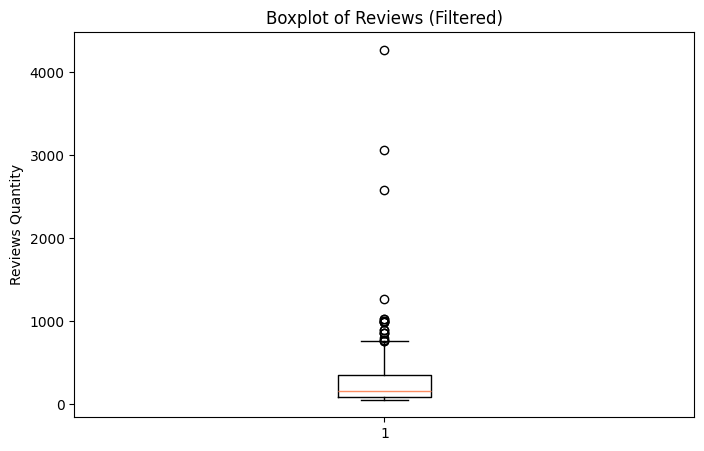

In [115]:
# Set the color palette
sns.set_palette('Set2')

# Create the boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(filteredReviews['Reviews'])
plt.title('Boxplot of Reviews (Filtered)')
plt.ylabel('Reviews Quantity')
plt.show()

The boxplot provides insight into the review counts of products, specifically focusing on those with at least 52 reviews. The central box covers most of the review counts, showing where the data is mainly concentrated, while the line within represents the median review count. Dots outside the box, known as outliers, highlight products with higher review counts compared to the average. This visualization effectively captures the distribution of review counts without the lower boundary.

However, having only 303 data remaining is still not ideal for this analysis. Therefore, an alternative method will be used.

In [116]:
# Method 2 : Filtering

# Remove rows with 1 review
dfClean.loc[(dfClean['Reviews']>1)]

,Condition,Drug,Type,Reviews,Effective,Ease of Use,Satisfaction,Average Price,Form
0,Infectious Disease,Levofloxacin,RX,994,2.52,3.01,1.84,172.99,Oral Solids
2,Infectious Disease,Moxifloxacin,RX,755,2.78,3.00,2.08,74.99,Oral Liquids
3,Infectious Disease,Azithromycin,RX,584,3.21,4.01,2.57,32.10,Oral Solids
11,Infectious Disease,Levofloxacin 2,RX,361,2.44,2.96,1.68,172.99,Oral Solids
13,Infectious Disease,Amoxicillin,RX,353,3.04,3.37,2.34,12.59,Oral Solids
...,...,...,...,...,...,...,...,...,...
2209,Infectious Disease,Miconazole-Skin Clnsr17,OTC,4,3.00,4.75,3.00,13.99,Ointments
2211,Infectious Disease,Miconazole Nitrate 8,OTC,3,3.33,5.00,2.00,13.99,Ointments
2212,Infectious Disease,Clotrimazole 3,OTC,2,4.50,5.00,4.50,25.63,Ointments
2213,Infectious Disease,Clotrimazole 4,OTC,2,4.50,4.50,4.50,25.63,Ointments


To ensure the dataset size remains ideal, the reviews considered insignificant are those with just 1 review, as they may not be representative. The code excludes rows with only 1 review, resulting in a total of 1171 rows, which is still considered acceptable for analysis.

In conclusion, the further analysis will use the second method, which involves filtering data based on review counts instead of relying on confidence intervals.

##### **Most Frequent Disease**

This analysis begins with pinpointing the disease that is most commonly found. This initial step is crucial as it sets the direction for the entire analysis by concentrating on a particular health issue of interest.

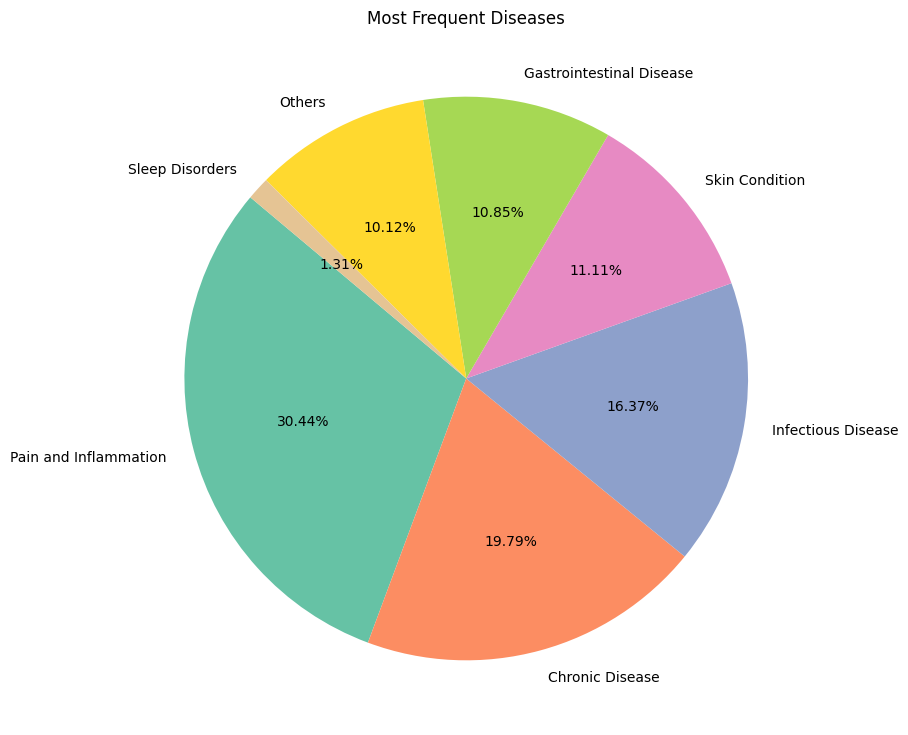

In [117]:
# Create variable to select the column
condition = dfClean['Condition']

# Count the frequency of each disease
diseaseCounts = condition.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 9))
plt.pie(diseaseCounts, labels=diseaseCounts.index, autopct='%1.2f%%', startangle=140)
plt.title('Most Frequent Diseases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Filtering is used to gain this information. From the pie chart above, Pain and inflammation were observed as the most common condition, accounting for **30.44%** of cases. Chronic diseases followed closely at **19.79%**, while infectious diseases claimed the third position with a prevalence of **16.37%**. Skin conditions and gastrointestinal issues exhibited comparable frequencies, each at **11.11%** and **10.85%** respectively. Sleep disorders were notably less common, representing only **1.31%** of cases. Other conditions collectively made up **10.12%** of the dataset.

Due to the substantial prevalence of **pain and inflammation**, the next analysis will focus primarily on this condition.

##### **Top 5 Effective Drugs**

Previously, it was established that pain and inflammation are the most frequent diseases. The next step is to identify the most effective drug for treating this condition using filtering. 

In [118]:
# Define the most frequent disease variable
disease = dfClean[dfClean['Condition'] == 'Pain and Inflammation']

# Sort the DataFrame by 'Effective' in descending order
sortedDrug = disease.sort_values(by='Effective', ascending=False)

# Select the top 5 effective drugs
topEffectiveDrugs = sortedDrug.head(5)

# Select the needed column
effective = topEffectiveDrugs[['Drug', 'Effective']]

# Show result
effective

,Drug,Effective
2108,Chlorpheniram-DM-Acetaminophen 7,5.0
1576,Lidocaine-Hydrocortisone-Aloe,5.0
1038,Doxylamine-DM-Acetaminophen 6,5.0
1039,Acetaminophen 65,5.0
1043,Doxylamine-DM-Acetaminophen 7,5.0


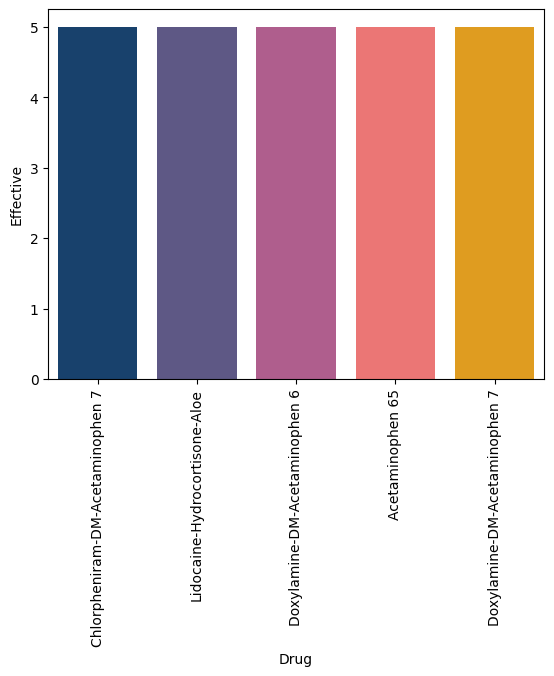

In [119]:
# Select the colors
colors = ['#0a417a', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Plot the graph
sns.barplot(data=topEffectiveDrugs, x='Drug', y='Effective', orient='v', hue='Drug', palette=colors, legend=False)
plt.xticks(ticks=range(len(topEffectiveDrugs['Drug'])), labels=topEffectiveDrugs['Drug'], rotation=90)
plt.show()

The code above reveals the top 5 effective drugs: Chlorpheniram-DM-Acetaminophen 7, Lidocaine-Hydrocortisone-Aloe, Doxylamine-DM-Acetaminophen 6, Acetaminophen 65, and Doxylamine-DM-Acetaminophen 7. The barchart shows the visualization of the findings. Remarkably, all these drugs have an effectiveness rating of 5 out of 5, indicating their high efficacy in treating pain and inflammation.

##### **Average Cost of the Top Drugs**

After gathering insights on the top effective drugs, the next step is to closely examine their price information. This involves comparing the costs of the top 5 drugs to identify which one has the lowest price. This analysis is very important for finding the drug that not only works well but also offers good value for money, making it a cost-effective choice for treatment.

In [120]:
# Define the average cost variable
avgCost = topEffectiveDrugs[['Drug', 'Average Price']]

# Show result
avgCost

,Drug,Average Price
2108,Chlorpheniram-DM-Acetaminophen 7,8.79
1576,Lidocaine-Hydrocortisone-Aloe,53.99
1038,Doxylamine-DM-Acetaminophen 6,9.99
1039,Acetaminophen 65,11.99
1043,Doxylamine-DM-Acetaminophen 7,6.87


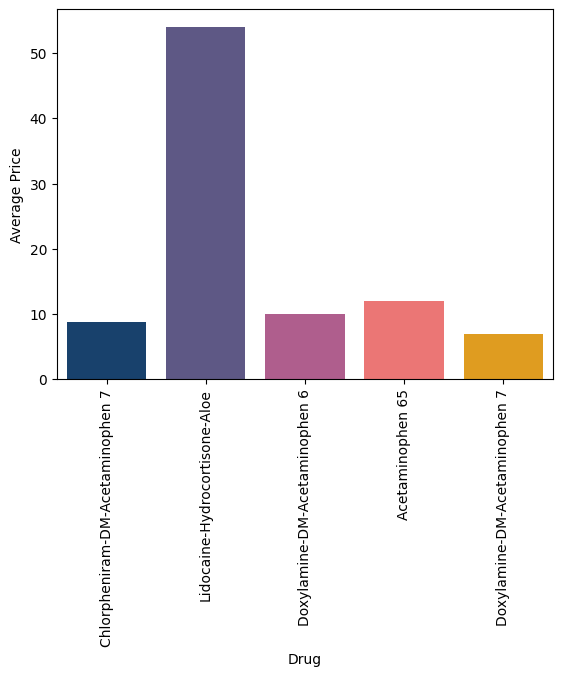

In [121]:
# Select the colors
colors = ['#0a417a', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Plot the graph
sns.barplot(data=avgCost, x='Drug', y='Average Price', orient='v', hue='Drug', palette=colors)
plt.xticks(ticks=range(len(avgCost['Drug'])), labels=avgCost['Drug'], rotation=90)
plt.show()

The prices of the top 5 effective drugs have been provided with filtering method. A bar chart is utilized to visually represent the prices of these drugs. The most expensive drug, Lidocaine-Hydrocortisone-Aloe, is priced at **$53.99**, while the least expensive drug, Doxylamine-DM-Acetaminophen 7, costs **$6.87**.

##### **Drug Form vs Ease of Use**

After determining the prices of the top 5 drugs, the next phase involves examining how do drugs, across their various forms (tablets, capsules, liquids), are rated in terms of ease of use. This step aims to understand the relationship between the cost-effectiveness of a medication and the user experience associated with its form.

In [122]:
# Calculate the mean ease of use rating
avgEase = dfClean.groupby('Form')['Ease of Use'].mean().reset_index()

# Show result
avgEase

,Form,Ease of Use
0,Injectables,3.388214
1,Ointments,4.034106
2,Oral Liquids,3.842927
3,Oral Solids,4.016273
4,Others,3.909024


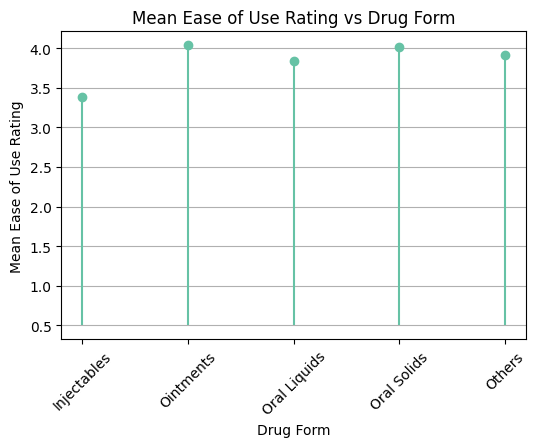

In [123]:
# Plot the lollipop chart
plt.figure(figsize=(6, 4))
plt.stem(avgEase['Form'], avgEase['Ease of Use'], markerfmt='o', basefmt=' ', linefmt='C0-', bottom=0.5)
plt.xticks(rotation=45)
plt.xlabel('Drug Form')
plt.ylabel('Mean Ease of Use Rating')
plt.title('Mean Ease of Use Rating vs Drug Form')
plt.grid(axis='y')
plt.show()

Filtering is also used in this analysis. The lollipop chart displays the mean ease of use ratings among five categories of drug forms. Notably, **ointments**, designed for external use, have the highest ease of use rating at around 4. Meanwhile, oral solids and oral liquids display similar ratings which is around 3.9. The least preferred drug form is injectables, which have a rating of around 3.4. Conversely, the "Others" category have the ratings of 3.9, indicating that these forms are also considered user-friendly.

##### **Correlation between Ease of Use vs Satisfaction**

After analyzing the distribution of drug forms by their ease of use ratings, the focus shifts to understanding the correlation between ease of use and satisfaction, exploring whether drugs rated as easier to use also result in higher satisfaction levels among customers.

In [124]:
# Calculate skew of the distribution
skewEase = dfClean['Ease of Use'].skew()
skewSatisfaction = dfClean['Satisfaction'].skew()

# Show result
print(f"Skewness of Ease of Use: {skewEase:.2f}")
print(f"Skewness of Satisfaction: {skewSatisfaction:.2f}")

Skewness of Ease of Use: -1.33
Skewness of Satisfaction: -0.19


Before analyzing the correlation between ease of use and satisfaction, it is important to check whether the data for both variables are normally distributed. This is done by looking at skewness, which measures how symmetrical the data is. `Ease of Use` has a skewness of -1.33, showing it's highly skewed to the left, while `Satisfaction` has a skewness of -0.19, indicating it's approximately symmetric. This step helps decide the right statistical methods for further analysis, as normal distribution is a common assumption for many of them.

In [125]:
# Cleans outlier from Ease of Use column
q1 = dfClean['Ease of Use'].quantile(0.25)
q3 = dfClean['Ease of Use'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 3 * iqr
low_bound = q1 - 3 * iqr

print(f'Upper Boundary 1: {up_bound:.2f}')
print(f'Lower Boundary 1: {low_bound:.2f}')

# Define outlier 1
no_outlier = dfClean[(dfClean['Ease of Use'] >= low_bound) & (dfClean['Ease of Use'] <= up_bound)]

# Cleans outlier from Satisfaction column
avg = no_outlier['Satisfaction'].mean()
std = no_outlier['Satisfaction'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary 2: {up_bound:.2f}')
print(f'Lower Boundary 2: {low_bound:.2f}')

# Define outlier 2
no_outlier2 = no_outlier[(no_outlier['Satisfaction'] >= low_bound) & (no_outlier['Satisfaction'] <= up_bound)]

Upper Boundary 1: 8.75
Lower Boundary 1: -0.28
Upper Boundary 2: 6.89
Lower Boundary 2: -0.49


The code above removes outliers from both the `Ease of Use` and `Satisfaction` columns using different techniques tailored to each column's distribution. Specifically, Tukey's Rule is applied to `Ease of Use` due to its non-normal distribution, while z-score calculation is used for `Satisfaction` because it follows a normal distribution. As a result, 'no_outlier1' contains data without outliers from the column `Ease of Use`, while 'no_outlier2' has data without outliers from the `Satisfaction` column. This ensures that outliers are appropriately handled in both variables before conducting further analysis or computations.

Given that `Ease of Use` is highly skewed to the left and `Satisfaction` is approximately symmetric, implying that the data may not be perfectly normal, Spearman's rank correlation is the chosen method for calculating the correlation. This approach is preferred because it is suitable for situations where at least one of the variables does not follow a normal distribution. Spearman's method evaluates the monotonic relationship between two variables, making it well-suited to handle the non-normal distribution observed in the data for `Ease of Use`.

In [126]:
# Correlation using Spearman techniques
corr_rho, pval_s = stats.spearmanr(no_outlier2['Ease of Use'], no_outlier2['Satisfaction'])

# Show results
print("Correlation between Ease of Use and Satisfaction:")
print(f"rho-correlation: {corr_rho:.2f}\np-value: {pval_s}")

Correlation between Ease of Use and Satisfaction:
rho-correlation: 0.58
p-value: 1.6245739780411892e-139


<center>

![rho](./rho.png)


![p-value](./pval.png)


[Source](https://geographyfieldwork.com/SpearmansRankCalculator.html)

The correlation between `Satisfaction` and `Ease of Use` is as follows:

- Spearman's Rank Correlation Coefficient (rho): 0.58
- p-value: 1.6245739780408197e-139

Spearman's correlation coefficient (rho) measures the strength and direction of the correlation between two ranked variables. A correlation coefficient of 0.58 indicates a **moderate positive** correlation between `Satisfaction` and `Ease of Use` as seen on the figure above. This implies that as `Satisfaction` levels increase, `Ease of Use` also tends to increase, and vice versa.

Importantly, the correlation is **statistically significant**, as evidenced by the very low p-value of 1.6245739780408197e-139. This small p-value suggests that the observed correlation is very strong and not due to chance.

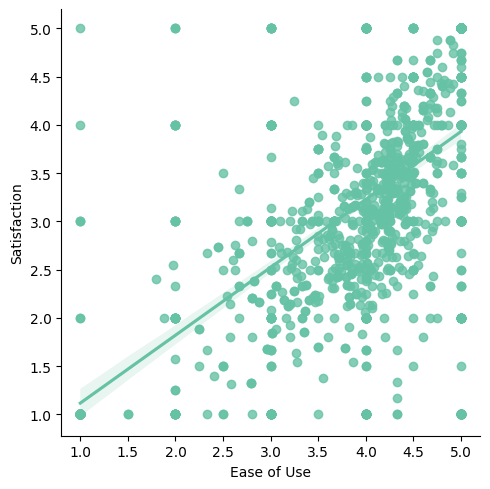

In [127]:
# Plot correlation between ease of use vs satisfaction
sns.lmplot(data=no_outlier2,x='Ease of Use', y='Satisfaction')

To clearly visualize the correlation between the two variables, Seaborn is used to create a scatter plot. The x-axis represents the ease of use, while the y-axis represents satisfaction. Each point on the plot corresponds to a pair of observations for `Ease of Use` and `Satisfaction`. The scatter plot shows a clear positive trend, indicating that as the `Ease of Use` rating increases, the `Satisfaction` level also tends to increase. This aligns with the Spearman's rank correlation coefficient (rho) and the low p-value, indicating a positive correlation between the two variables.

##### **Satisfication of Prescription (RX) vs Over-the-Counter (OTC)**

Finally, the analysis aims to test which type of medication, whether prescription (RX) or over-the-counter (OTC), gains higher satisfaction from customers. Hypothesis testing is used for this purpose. The null hypothesis (H0) states that there is no significant difference in mean satisfaction between RX and OTC medications, whereas the alternative hypothesis (H1) suggests that there exists a difference in mean satisfaction between RX and OTC medications.

H0 : The mean satisfaction between RX == OTC

H1 : The mean satisfaction between RX != OTC

In [128]:
# Filter the DataFrame for RX and OTC drugs
rx_satisfaction = dfClean[dfClean['Type'] == 'RX']['Satisfaction'].mean()
otc_satisfaction = dfClean[dfClean['Type'] == 'OTC']['Satisfaction'].mean()

# Print the average satisfaction levels
print(f'Average satisfaction for RX drugs: {rx_satisfaction}')
print(f'Average satisfaction for OTC drugs: {otc_satisfaction}\n')

# Filter the DataFrame for RX and OTC drugs
rx = dfClean[dfClean['Type'] == 'RX']['Satisfaction']
otc = dfClean[dfClean['Type'] == 'OTC']['Satisfaction']

# Conduct t-test
t_stat, p_val = stats.ttest_ind(rx, otc)

# Show results
print('T-Statistic:', t_stat)
print('P-value:', p_val)

# Interpret the results
if p_val < 0.05:
    print('\nThe difference in satisfaction levels between RX and OTC drugs is statistically significant.')
    if t_stat > 0:
        print('RX drugs have higher satisfaction levels.')
    else:
        print('OTC drugs have higher satisfaction levels.')
else:
    print('There is no statistically significant difference in satisfaction levels between RX and OTC drugs.')

Average satisfaction for RX drugs: 3.0734936211972523
Average satisfaction for OTC drugs: 3.484059829059829

T-Statistic: -6.024337572932321
P-value: 2.137427593595635e-09

The difference in satisfaction levels between RX and OTC drugs is statistically significant.
OTC drugs have higher satisfaction levels.


The average satisfaction for RX drugs was 3.07, whereas the average satisfaction for OTC drugs was notably higher at 3.48. This indicates that, on average, customers reported higher satisfaction levels with OTC drugs compared to RX drugs.

The calculated t-statistic of -6.02 with a p-value of 2.14e-09 suggests a highly statistically significant difference in satisfaction levels between RX and OTC drugs. The negative t-statistic indicates that the mean satisfaction for RX drugs was significantly lower than that for OTC drugs.

Therefore, based on the analysis, it can be concluded that OTC drugs are associated with higher satisfaction levels among customers compared to RX drugs, and this difference is statistically significant. This may due to the OTC have the same effectiveness as the RX with much cheaper price.

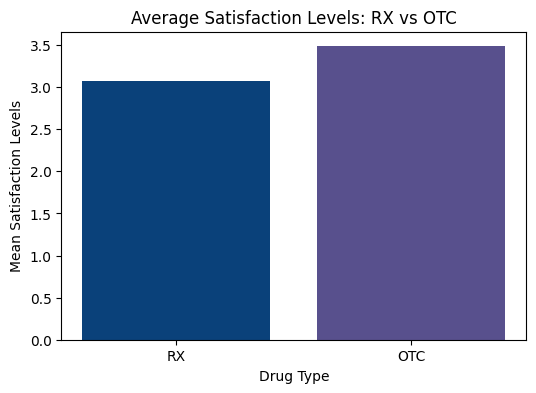

In [129]:
# Set the colors
colors = ['#0a417a', '#58508d']

# Define variables
labels = ['RX', 'OTC']
means = [rx_satisfaction, otc_satisfaction]

# Plot the graph
plt.figure(figsize=(6, 4))
plt.bar(labels, means, color=colors)
plt.xlabel('Drug Type')
plt.ylabel('Mean Satisfaction Levels')
plt.title('Average Satisfaction Levels: RX vs OTC')
plt.show()

The bar chart illustrates the mean satisfaction levels for RX and OTC drugs, with RX averaging around 3.1 and OTC close to 3.5. Based on this data, it can be concluded that customers generally prefer OTC drugs over RX drugs in terms of satisfaction.

##### **Top 5 Drugs Performance**

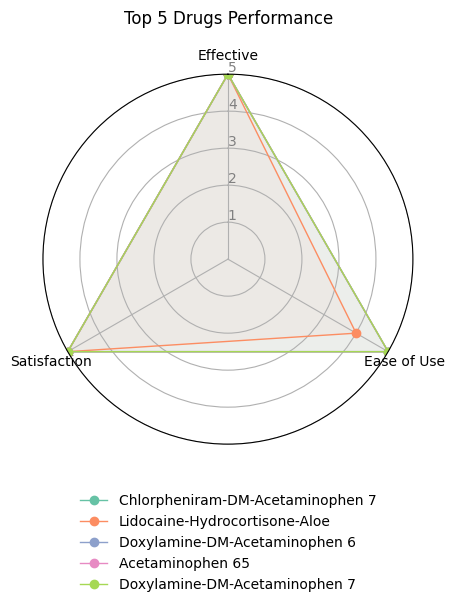

In [130]:
from math import pi
from matplotlib.gridspec import GridSpec

# Select column
data = topEffectiveDrugs[['Drug', 'Effective','Ease of Use','Satisfaction']]

# Create function to plot chart
def create_radar_chart(df):

    categories=['Effective','Ease of Use','Satisfaction']
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = fig.add_subplot(gs[0, 0], polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, size=10)

    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=10)
    plt.ylim(0,5)
    
    for index, row in df.iterrows():
        values=df.loc[index].drop(['Drug']).values.flatten().tolist()
        values+= values[:1]

        ax.plot(angles, values, 'o-', linewidth=1, label = df.loc[index]["Drug"])
        ax.fill(angles, values, alpha=0.05)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=False, shadow=False, ncol=1, fontsize=10, frameon=False)

# Create plots
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1], wspace=0.1)
fig.suptitle('Top 5 Drugs Performance', fontsize=12,x=0.31,y=0.98)

# Add chart
create_radar_chart(data)
plt.subplots_adjust(top=0.85)


After finding that `Ease of Use` and `Satisfaction` are correlated and are important parameters, the next step is to assess the performance of the top 5 drugs. To do this, the code utilizes a Radar chart to evaluate the effectiveness, satisfaction, and ease of use ratings of these drugs. The chart reveals that most of these drugs received a rating of 5, causing them to overlap with each other. This indicates that the top 5 drugs have performed excellently.

### **Conclusion**

After comprehensive analysis, several key conclusions are:
- The primary objective is to identify the most cost-efficient pharmaceutical options, striving for a substantial cost reduction of at least 15% within a six-month timeframe.
- A minimum of two reviews are necessary for statistical significance in this analysis.
- Pain and Inflammation stand out as the most frequently occurring conditions.
- The top-performing drugs for treating Pain and Inflammation are Chlorpheniramine-DM-Acetaminophen 7, Lidocaine-Hydrocortisone-Aloe, Doxylamine-DM-Acetaminophen 6, Acetaminophen 65, and Doxylamine-DM-Acetaminophen 7.
- Regarding pricing, the highest-priced medication is Lidocaine-Hydrocortisone-Aloe, priced at $53.99, whereas the most economical option, Doxylamine-DM-Acetaminophen 7, is priced at $6.87.
- Ointment form gains the highest ease of use rating among drug forms.
- A positive correlation exists between ease of use ratings and satisfaction ratings.
- There is a significant difference in satisfaction levels between prescription (RX) and over-the-counter (OTC) drugs, with OTC options have higher satisfaction ratings.
- The top 5 drugs performed excellently.

### **Recommendation**

The recommendation for the company is to focus on acquiring more drugs that exhibit high effectiveness while also being more cost-effective. These drugs can then be priced slightly higher to ensure an increase in profits while maintaining competitiveness in the market.